![DSA-Logo.png](.\images\DSA-Logo.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>Maio, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 05- Machine Learning (`Step 01`)

Nesta etapa, vamos iniciar a fase de **`Machine Learning`**, treinando e analisando alguns algoritmos de classificação. Utilizaremos o dataset de treinamento que foi criado/atualizado na fase anterior **`04-Preprocessing`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento que foi criado e atualizado na fase anterior: **`santander_train_v2.pickle`**;


2. Definir as **`métricas de classificação`** que serão calculadas nas etapas de **`Machine Learning`**;


3. Balancear o nosso dataset de treinamento (relacionado a nossa variável target - `Satisfaction`) para evitarmos *Overfitting*;


4. Treinar alguns algoritmos de classificação, utilizando **`Feature Selection`** e **`Cross Validation`**:

> Nesta etapa (**`Step 01`**) serão treinados os seguintes algoritmos:

>> **` SGD`**: Stochastic Gradient Descent;
>> **` KNN`**: K Nearest Neighbors;
>> **` LGR`**: Logistic Regression;
>> **` DTC`**: Decision Tree Classifier;

> Na próxima etapa (**`Step 02`**) serão treinados outros algoritmos, a saber:

>> **` RFC`**: Random Forest Classifier;
>> **` LDA`**: Linear Discriminant Analysis;
>> **`LSVC`**: Linear Support Vector Classification;
>> **`XGBC`**: XGBoost Classifier.


5. Salvar os *datasets*, após o **balanceamento**, com os dados de treinamento;


6. Salvar as **métricas de classificação** calculadas nesta etapa (**`Step 01`**).

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas
import itertools

# To plot pretty figures
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Funções para balanceamento dos dados:
from imblearn import over_sampling as ovs
import collections

# Imports métricas para "Avaliação do Modelo":
from sklearn.metrics import roc_curve, roc_auc_score

# Machine Learning imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier # Classificador SGD.
from sklearn.neighbors import KNeighborsClassifier # Classificador KNN.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score # Cross Validation Score.
from sklearn.model_selection import cross_val_predict # Cross Validation Predict.

# Flag de "Treinamento":
# Se "True", realiza o treinamento de todos os algoritmos.
# Se "False", faz a leitura dos modelos (objetos) treinados.
TRAINING=False

# Flag para calcular/ler os "scores" de "Treinamento":
# Se "True", realiza o cálculo das pontuações (scores).
# Se "False", faz a leitura dos scores (objetos) calculados.
CROSS_VAL_SCORE=False

# Flag para fazer as previsões, utilizando validação cruzada, nos dados de treinamento:
# Se "True", faz as previsões utilizando a função.
# Se "False", faz a leitura das previsões (objetos) que foram salvas.
CROSS_VAL_PREDICT=False

# Define valor para "Cross Validation" (Número de 'folds'):
NUM_FOLDS=5 # Número de passadas ("folds")

# Define valor para "Cross Validation Score" (Número de 'folds'):
NUM_FOLDS_CVS=5 # Número de passadas ("folds")

# Define valor para "Cross Validation Predict" (Número de 'folds'):
NUM_FOLDS_CVP=5 # Número de passadas ("folds")

# Define valor para reproduzirmos os mesmos resultados:
RANDOM_STATE=42 # Seed

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "05-Machine_Learning")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Modelos" (Machine Learning) relacionados ao Projeto:
PROJECT_ML_PATH = os.path.join(PROJECT_ROOT_DIR, "Models")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_ML_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Testes" (Machine Learning) relacionados ao Projeto:
PROJECT_TEST_PATH = os.path.join(PROJECT_ROOT_DIR, "Tests")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_TEST_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_ML_Library_v1_0":
import DataScience_ML_Library_v1_0 as mllib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

# Criando um objeto para calularmos os tempos de treinamento:
et = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

seaborn    0.10.0
matplotlib 3.2.1
pandas     0.25.3
numpy      1.18.2
Walter Trevisan


## 01- Carregando o *data frame* de `Treinamento`: `santander_train_v2.pickle`

In [3]:
# Carregando o objeto (data frame) do projeto:
train_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_train_v2.pickle",
                                    msg="The 'santander_train_v2' (data frame) has been successfully uploaded!")

The 'santander_train_v2' (data frame) has been successfully uploaded!


In [4]:
# Criando um objeto com o nome das features:
feat_names = list(train_df.columns)
feat_names.remove('Satisfaction') # Removendo a feature TARGET (Satisfaction).
print("Features: {}".format(len(feat_names)))
print(feat_names)

Features: 41
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_2', 'num_var4_cat_3', 'num_var4_cat_4', 'num_var4_cat_5', 'num_var4_cat_6', 'num_var4_cat_7', 'var36_cat_0', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_1', 'num_meses_var5_ult3_cat_2', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'num_meses_var39_vig_ult3_cat_3', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'num_var5_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


## 02- Definição das `Métricas de Classificação`:

### Métricas: `Accuracy`, `Precision`, `Recall`, `f1-score` e `ROC Curve (AUC)`

### `Accuracy`:

A **acurácia** do modelo mede a taxa de acertos das classes ***True Positive*** e ***True Negative***, sendo calculada pela fórmula abaixo:

**`Accuracy = (TP + TN)/(TP + TN + FP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`TN`** é o número de ***verdadeiros negativos***;

3. **`FP`** é o número de ***falsos positivos***.

4. **`FN`** é o número de ***falsos negativos***.

Um classificador perfeito teria apenas *verdadeiros positivos* (**TP**) e *verdadeiros negativos* (**TN**), ou seja, sua **matriz de confusão** teria valores diferentes de zero somente na sua diagonal principal (superior esquerda para a inferior direita), ou seja, a sua acurácia (**`accuracy`**) seria de **100%**.

### `Precision`:

Uma outra métrica interessante a ser observada na ***matriz de confusão*** é a `acurácia das previsões positivas`; que é chamada de ***precisão (precision)*** do classificador e é calculada pela fórmula abaixo:

**`Precision = TP/(TP + FP)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FP`** é o número de ***falsos positivos***.

### `Recall`:

Entretanto, a precisão é utilizada em conjunto com outra métrica chamada ***revocação (recall)***, também conhecida como ***sensibilidade*** ou ***taxa de verdadeiros positivos (TPR)***: esta é a taxa de `instâncias positivas que são corretamente detectadas` pelo classificador, sendo calculada pel fórmula abaixo:

**`Recall = TP/(TP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***.

### `f1-score`:

Muitas vezes, é conveniente combinarmos **precisão** e **revocação** em uma única métrica chamada ***pontuação F1 (f1 score)***, principalmente se precisarmos comparar dois ou mais classificadores.

A ***pontuação F1*** é a ***média harmônica*** da **precisão** e **revocação**, sendo calculada pela fórmula abaixo:

**`F1 = TP/(TP + (FN + FP)/2)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***;

3. **`FP`** é o número de ***falsos positivos***.

Enquanto a média regular trata igualmente todos os valores, a média harmônica dá muito mais peso aos valores mais baixos, ou seja, o classificador só obterá uma ***pontuação F1*** alta, se a **revocação** e a **precisão** forem altas.

### `ROC Curve (AUC)`

A curva **ROC** (*características operacionais do receptor*) é outra ferramenta comum utilizada com classificadores binários. É muito semelhante à curva de **`precision/recall`**, mas, em vez de plotar a **precision versus recall**, a curva **ROC** plota a *taxa de verdadeiros positivos* (***TPR = True Positive Rate***), que é um outro nome dado para ***recall***, versus a *taxa de falsos positivos* (***FPR = False Positive Rate***). O ***FPR*** é a razão de instâncias negativas incorretamente classificadas como positivas. É igual a 1 menos *taxa de verdadeiros negativos* (***TNR = True Negative Rate***), que é a razão de instâncias negativas que são corretamente classificadas como negativas. A ***TNR*** também é chamada de ***especificidade***.

Portanto, a ***Curva ROC*** plota a ***`sensibilidade (recall)` versus `1 - especificidade`***.

Equações:

1. **`TPR = TP/(TP + FN)`** --> ***True Positive Rate***, ou também ***`recall`*** ou também ***`sensibilidade`***

2. **`FPR = FP/(FP + TN)`** --> ***False Positive Rate***

3. **`TNR = TN/(TN + FP)`** --> ***True Negative Rate***, ou também ***especificidade***

4. **`FPR = 1 - TNR`** ou também **`FPR = 1 - especificidade`**

Então, para plotarmos a ***ROC curve***, primeiro precisamos calcular a **TPR** e a **FPR** para vários valores de ***thresholds*** (limiares) utilizando a função ***`roc_curve()`***.

Mas, a função `roc_curve()` utiliza as **pontuações de decisão** (ao invés das previsões) de todas as instâncias do nosso dataset, ou seja, precisamos primeiro calcular estas pontuações (`scores`) de decisão utilizando o método `decision_function` da função `cross_val_predict()`.

Entretando, devido ao modo como funcionam, alguns classificadores (por exemplo: a classe `KNeighborsClassifier`) não possuem um método `decision_function()`. Em vez disso, eles possuem um método chamado `predict_proba()`. Este método retorna um array que contém uma linha por instância e uma coluna por classe, cada uma contendo a probabilidade de a instância dada pertencer à classe dada (por exemplo, neste projeto, 70% de chance de um cliente estar insatisfeito). Portanto, quando utilizarmos estes classificadores, primeiro precisaremos calcular as probabilidades com o método `predict_proba()`, e, então, em seguida calcularemos as *pontuações de decisão* utilizando a probabilidade da classe positiva como sendo a pontuação.

Observando o gráfico da **Curva ROC**, quanto maior a ***`TPR (recall)`***, mais falsos positivos (***`FPR`***) o classificador produz, ou seja, menor é a sua **precisão** (***`precision`***). A linha pontilhada representa a curva ROC de um classificador puramente aleatório; um bom classificador fica mais distante dessa linha possível (em direção ao canto superior esquerdo)!

Uma forma de compararmos dois ou mais classificadores é medirmos a **área abaixo da curva** (***`AUC = Area Under Curve`***). Um classificador perfeito terá um ***`ROC AUC = 1`***, enquanto que um classificador puramente aleatório terá um ***`ROC AUC = 0.5`***.

Portanto, vamos criar um objeto do tipo *data frame* para armazenar as seguintes métricas de classificação, para cada algorítimo de *machine learning* que será utilizado nesta e na próxima etapa, a saber: **`Accuracy`**, **`Precision`**, **`Recall`**, **`f1-score`** e **`AUC`**:

In [5]:
# Agora, vamos criar um data frame onde serão armazenadas as métricas de classificação de todos os algoritmos:
classif_metrics_df = pd.DataFrame(data={}, columns=['Accuracy', 'Precision', 'Recall', 'f1-score', 'AUC'],
                                  index=['SGD', 'KNN', 'LGR', 'DTC', 'RFC', 'LDA', 'LSVC', 'XGBC'])

# Define um nome para os índices:
classif_metrics_df.index.name = 'Models'

# Mostrando o data frame criado:
classif_metrics_df

,Accuracy,Precision,Recall,f1-score,AUC
Models,,,,,
SGD,NaN,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN,NaN
LGR,NaN,NaN,NaN,NaN,NaN
DTC,NaN,NaN,NaN,NaN,NaN
RFC,NaN,NaN,NaN,NaN,NaN
LDA,NaN,NaN,NaN,NaN,NaN
LSVC,NaN,NaN,NaN,NaN,NaN
XGBC,NaN,NaN,NaN,NaN,NaN


## 03- Balanceamento do dataset utilizando a variável *target* (`Satisfaction`)

Nas etapas de `Análise Exploratória` identificamos que o nosso dataset de treinamento possui apenas **`4%`** de observações classificadas como clientes insatisfeitos (`Satisfaction = 1`), ou seja, temos um dataset de treinamento *desbalanceado*. Neste caso precisamos realizar um *balanceamento* do dataset para evitarmos um *viés* no treinamento dos modelos de *machine learning*, ocasioando *Overfitting*.

Utilizaremos a função **`SMOTE()`** do pacote **`imblearn.over_sampling`**. Para maiores informações sobre a função **[clique aqui](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)**.

In [6]:
# Balanceando os dados com a função "SMOTE":
# SMOTE é um metodo de oversampling. Ele cria exemplos sintéticos da classe minoritaria ao inves de criar copias.

# Separando as "features" no objeto "X" e a variável target (Satisfaction) no objeto "y":
X = train_df[feat_names].values
y = train_df.Satisfaction.values

# Aplicando a função SMOTE:
X_train, y_train = ovs.SMOTE(random_state=RANDOM_STATE).fit_sample(X, y)

# # Verificando o "shape" do dataset alterado:
print("Shape(features): ", X_train.shape)
print("  Shape(target): ", y_train.shape)

Shape(features):  (116820, 41)
  Shape(target):  (116820,)


In [7]:
# Utilizando a função "Counter" do pacote "collections" para contarmos as quantidades de classes da nossa variável target
# (Satisfaction) após o balanceamento:
collections.Counter(y_train)

Counter({0: 58410, 1: 58410})

In [8]:
# Verificando se existem "missing values" após o balanceamento:
if (not np.any(np.isnan(X_train))):
    print("There are no missing values!")

There are no missing values!


**Análise:** Pronto! Temos o nosso dataset de *treinamento* **`Balanceado`**.

## 04- Treinamento dos algoritmos com `Feature Selection` e `Cross Validation`:

Agora, vamos realizar o treinamento de alguns algoritmos de `machine learning`, selecionando as `features` mais significativas (`importantes`) com `cross validation`. Utilizaremos a função **[RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)** (*Feature ranking with recursive feature elimination and cross-validated selection of the best number of features*) do pacote `feature_selection` do `Scikit-Learn`.

## 4.1- [SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) (Stochastic Gradient Descent):

In [9]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (SGD)..."))
    
    # Criando uma instância do classificador SGD:
    sgd = SGDClassifier(max_iter=1000, tol=-np.infty, random_state=RANDOM_STATE)
    
    # Criando a instância de "RFECV":
    rfecv_sgd = RFECV(estimator=sgd, step=1, cv=NUM_FOLDS, scoring='accuracy', n_jobs=-1)
    
    # Fit nos dados de treinamento com as features mais importantes:
    rfecv_sgd.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (SGD):")
    
    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfecv_sgd_v1.pickle", object_name=rfecv_sgd,
                              msg="Version 1 of the model (SGD) was successfully saved!")
else:
    # O modelo (SGD) já foi treinado!
    # Carregando o modelo "rfecv_sgd_v1.pickle":
    rfecv_sgd = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_sgd_v1.pickle",
                                         msg="The model (SGD) has been successfully uploaded!")

The model (SGD) has been successfully uploaded!


**Análise:** o treinamento do **`SGD`** demorou **`14.86 minutos`**.

Optimal number of features : 37
Best accuracy: 0.7567
Saving figure: plot_nbf_vs_cvs_sgd


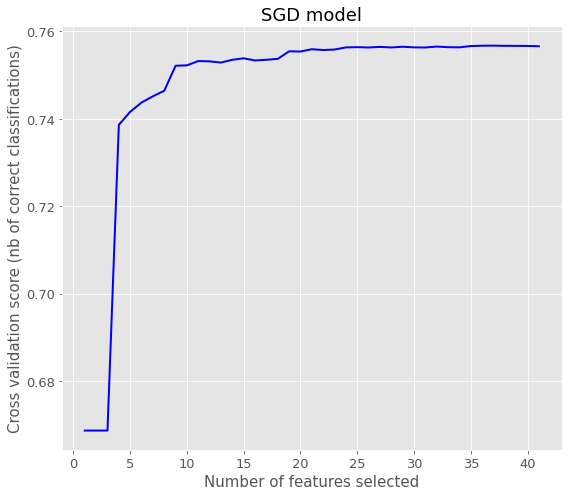

Saving figure: plot_nbf_vs_cvs_zoomed_sgd


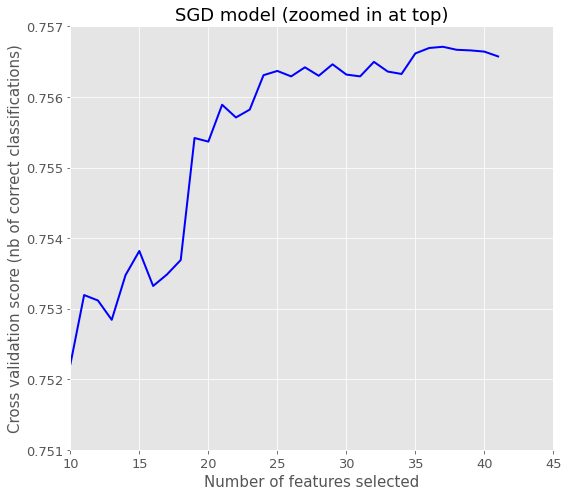

In [10]:
# Plot: número de features versus cross-validation scores:
print("Optimal number of features : %d" % rfecv_sgd.n_features_)
print("Best accuracy: {}".format(np.round(rfecv_sgd.grid_scores_[rfecv_sgd.n_features_-1], decimals=4)))
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_sgd.grid_scores_) + 1), cv_scores=rfecv_sgd.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=None,
                                   title='SGD model', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_sgd', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

# Plot: número de features versus cross-validation scores (com 'foco' na parte de cima do gráfico):
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_sgd.grid_scores_) + 1), cv_scores=rfecv_sgd.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=[10, 45, 0.751, 0.757],
                                   title='SGD model (zoomed in at top)', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_zoomed_sgd', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

In [11]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfecv_sgd.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 37
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_3', 'num_var4_cat_4', 'num_var4_cat_6', 'num_var4_cat_7', 'var36_cat_0', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_1', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'num_meses_var39_vig_ult3_cat_3', 'var38_qt', 'var15_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'num_var5_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


In [12]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes):
X_train_sgd = X_train[:, rfecv_sgd.get_support()]
print("X_train_sgd (shape):",X_train_sgd.shape)

X_train_sgd (shape): (116820, 37)


**Análise:** com o algoritmo **`SGD`** a melhor acurácia que obtivemos foi de **`75.67%`** utilizando **`37`** features.

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`SGDClassifier`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [13]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (SGD)..."))
    sgd_scores = cross_val_score(estimator=rfecv_sgd.estimator_, X=X_train_sgd, y=y_train,
                                 cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (SGD):")
    
    # Salvando as pontuações calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="sgd_scores_v1.pickle", object_name=sgd_scores,
                              msg="Version 1 of the scores (SGD) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "sgd_scores_v1.pickle":
    sgd_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="sgd_scores_v1.pickle",
                                          msg="The scores (SGD) has been successfully uploaded!")

The scores (SGD) has been successfully uploaded!


In [14]:
# Mostrando os resultados:
mllib.display_scores(scores=sgd_scores)

Scores: 5
[0.7592 0.7558 0.7572 0.7499 0.7613]
Mean: 0.7567
Standard deviation: 0.0038


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`SGD`**, foi de **24.62 segundos**. Obtivemos um resultado **satisfatório (acima de 75%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [15]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (SGD)..."))
    y_train_pred_sgd = cross_val_predict(estimator=rfecv_sgd.estimator_, X=X_train_sgd, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (SGD):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_sgd_v1.pickle", object_name=y_train_pred_sgd,
                              msg="Version 1 of the predicts (SGD) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_sgd_v1.pickle":
    y_train_pred_sgd = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_sgd_v1.pickle",
                                                msg="The predicts (SGD) has been successfully uploaded!")

The predicts (SGD) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`SGD`**, foi de **23.78 segundos**.

Saving figure: plot_confusion_matrix_sgd_v1


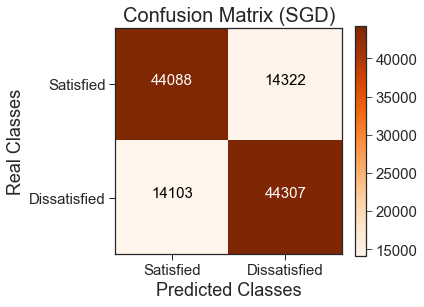

In [16]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_sgd, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (SGD)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_sgd_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 44088`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 14322`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 14103`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 44307`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [17]:
# Calculando e mostrando as métricas de classificação com o "SGD":
print("Metrics of 'SGD' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_sgd, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['SGD', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['SGD', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['SGD', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['SGD', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'SGD' model:
Accuracy = 0.7567
Precision = 0.7557
Recall = 0.7586
f1-score = 0.7571


**Análise:**

1. com o classificador **`SGD`** obtivemos uma taxa de **acurácia** de **75.67%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`SGD`** apresentou um resultado *muito abaixo do mínimo desejado*;


2. com o nosso classificador **`SGD`** obtivemos uma taxa de **precisão** de **75.57%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`SGD`** obtivemos uma taxa de **revocação** de **75.86%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`SGD`** apresentou um resultado *muito abaixo do mínimo desejado*;


4. com o classificador **`SGD`** obtivemos uma **`pontuação F1`** **baixa**, porque as taxas de **precisão** e **revocação** também foram baixas.

### `Curva ROC`

In [18]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (SGD)..."))
    y_dec_scores_sgd = cross_val_predict(estimator=rfecv_sgd.estimator_, X=X_train_sgd, y=y_train,
                                         cv=NUM_FOLDS_CVP, method="decision_function", n_jobs=-1)
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (SGD):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_sgd_v1.pickle", object_name=y_dec_scores_sgd,
                              msg="Version 1 of the decision scores (SGD) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_sgd_v1.pickle":
    y_dec_scores_sgd = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_sgd_v1.pickle",
                                                msg="The decision scores (SGD) has been successfully uploaded!")

The decision scores (SGD) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`SGD`**, foi de **24.08 segundos**.

In [19]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_sgd)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_sgd)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['SGD', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_sgd_v1


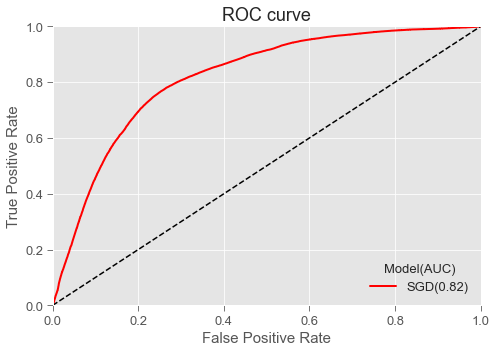

In [20]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='SGD', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_sgd_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`SGD`** apresentou uma ***`ROC curve`*** **distante** do *canto superior esquerdo*!

## 4.2- [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (K Nearest Neighbors):

Não é possível utilizarmos a função **`RFECV`** com o classificador **`KNN`**, porque ele não possui os atributos **`coef_`** ou **`feature_importances_`**. Portanto, neste caso, vamos primeiro realizar **`Feature Selection`** utilizando o classificador **`Random Forest`** em conjunto com a função **`RFE`** para selecionarmos as ***features*** mais significativas (**importantes**).

### `Feature Selection` (Random Forest Classifier):

In [21]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (RFE)..."))
    
    # Criando uma instância do classificador "Random Forest":
    rfc = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE)
    
   # Cria a instância de RFE, onde definimos a seleção de 20 features (mais importantes):
    rfe = RFE(rfc, n_features_to_select=20)
    
    # Fit nos dados de treinamento:
    rfe.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (RFE):")
    
    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfe_feature_selection.pickle", object_name=rfe,
                              msg="Feature Selection model (RFE) was successfully saved!")
else:
    # O modelo (KNN) já foi treinado!
    # Carregando o modelo "rfecv_knn_v1.pickle":
    rfe = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfe_feature_selection.pickle",
                                   msg="The model (RFE) has been successfully uploaded!")

The model (RFE) has been successfully uploaded!


**Análise:** o treinamento para a seleção de features com o **`RFE`** demorou **`1.55 minutos`**.

In [22]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 20
['ind_var30_cat_0', 'var36_cat_1', 'num_meses_var5_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_2', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


Saving figure: plot_importances_features_rfe


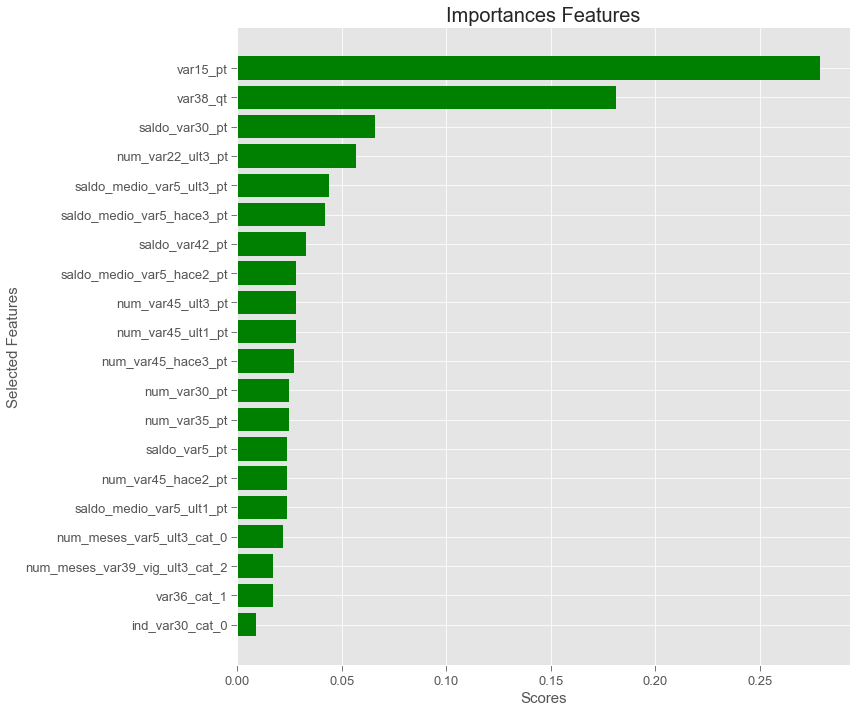

In [23]:
# Mostrando as features mais importantes classificadas pelo "Random Forest":
scores = np.round(rfe.estimator_.feature_importances_, decimals=3)
feat_importances = pd.DataFrame({'Features':selected_features,'Scores':scores})
feat_importances = feat_importances.sort_values('Scores',ascending=True).set_index('Features')

# Plot:
ptlib.plot_importances_features(feats=feat_importances.index, scores=feat_importances.Scores, plot_style='ggplot',
                                bar='h', bardim=0.8, align='center', color='g', title='Importances Features', title_fontsize=20,
                                xlabel='Scores', xlabel_fontsize=15, ylabel='Selected Features', ylabel_fontsize=15,
                                xtick_labelsize=13, ytick_labelsize=13, width=12, height=10,
                                figure_id='plot_importances_features_rfe', figure_path=PROJECT_IMG_PATH,
                                figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                               )

**Análise:** podemos observar no gráfico acima que as features mais importantes são: **`var15_pt`** e **`var38_qt`**.

Agora, vamos filtrar estas *features* no dataset de treinamento, para treinarmos o nosso algoritmo `KNN`:  

In [24]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes):
X_train_rfe = X_train[:, rfe.get_support()]
print("X_train_rfe (shape):",X_train_rfe.shape)

X_train_rfe (shape): (116820, 20)


In [25]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (KNN)..."))
    
    # Criando uma instância do classificador KNN:
    knn = KNeighborsClassifier(n_jobs=-1)
    
    # Fit nos dados de treinamento:
    knn.fit(X_train_rfe, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (KNN):")
    
    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="knn_v1.pickle", object_name=knn,
                              msg="Version 1 of the model (KNN) was successfully saved!")
else:
    # O modelo (KNN) já foi treinado!
    # Carregando o modelo "knn_v1.pickle":
    knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="knn_v1.pickle",
                                   msg="The model (KNN) has been successfully uploaded!")

The model (KNN) has been successfully uploaded!


**Análise:** o treinamento do **`KNN`** demorou **`6.42 segundos`**.

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`KNeighborsClassifier`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [26]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (KNN)..."))
    knn_scores = cross_val_score(estimator=knn, X=X_train_rfe, y=y_train,
                                 cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (KNN):")
    
    # Salvando as pontuações (scores) calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="knn_scores_v1.pickle", object_name=knn_scores,
                              msg="Version 1 of the scores (KNN) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "knn_scores_v1.pickle":
    knn_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="knn_scores_v1.pickle",
                                          msg="The scores (KNN) has been successfully uploaded!")

The scores (KNN) has been successfully uploaded!


In [27]:
# Mostrando os resultados:
mllib.display_scores(scores=knn_scores)

Scores: 5
[0.8701 0.8715 0.8724 0.8668 0.8728]
Mean: 0.8707
Standard deviation: 0.0022


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`KNN`**, foi de **27.96 segundos**. Obtivemos um resultado **ótimo (acima de 87%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [28]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (KNN)..."))
    y_train_pred_knn = cross_val_predict(estimator=knn, X=X_train_rfe, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (KNN):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_knn_v1.pickle", object_name=y_train_pred_knn,
                              msg="Version 1 of the predicts (KNN) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_knn_v1.pickle":
    y_train_pred_knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_knn_v1.pickle",
                                                msg="The predicts (KNN) has been successfully uploaded!")

The predicts (KNN) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`KNN`**, foi de **28.30 segundos**.

Saving figure: plot_confusion_matrix_knn_v1


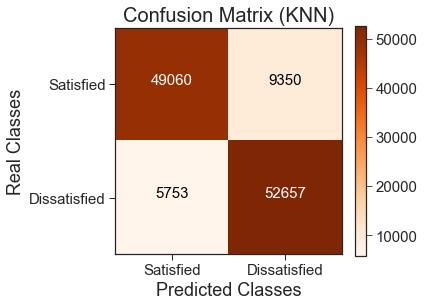

In [29]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_knn, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (KNN)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_knn_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 49060`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 9350`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 5753`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 52657`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [30]:
# Calculando e mostrando as métricas de classificação com o "KNN":
print("Metrics of 'KNN' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_knn, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['KNN', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['KNN', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['KNN', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['KNN', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'KNN' model:
Accuracy = 0.8707
Precision = 0.8492
Recall = 0.9015
f1-score = 0.8746


**Análise:**

1. com o classificador **`KNN`** obtivemos uma taxa de **acurácia** de **87.07%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`KNN`** apresentou um resultado *muito próximo do mínimo desejado*;


2. com o nosso classificador **`KNN`** obtivemos uma taxa de **precisão** de **84.92%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`KNN`** obtivemos uma taxa de **revocação** de **90.15%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`KNN`** apresentou um resultado *acima do mínimo desejado*;


4. com o classificador **`KNN`** obtivemos uma **`pontuação F1`** **alta**, devido principalmente a ótima taxa de **revocação**.

### `Curva ROC`

In [31]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (KNN)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_knn = cross_val_predict(estimator=knn, X=X_train_rfe, y=y_train,
                                     cv=NUM_FOLDS_CVP, method="predict_proba", n_jobs=-1)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_knn = y_probas_knn[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (KNN):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_knn_v1.pickle", object_name=y_dec_scores_knn,
                              msg="Version 1 of the decision scores (KNN) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_knn_v1.pickle":
    y_dec_scores_knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_knn_v1.pickle",
                                                msg="The decision scores (KNN) has been successfully uploaded!")

The decision scores (KNN) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`KNN`**, foi de **26.87 segundos**.

In [32]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_knn)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_knn)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['KNN', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_knn_v1


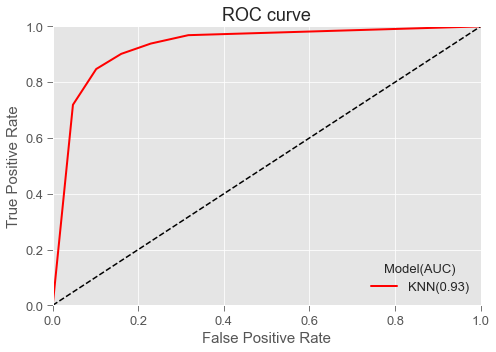

In [33]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='KNN', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_knn_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`KNN`** apresentou uma ***`ROC curve`*** **próxima** do *canto superior esquerdo*!

## 4.3- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

In [34]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (LGR)..."))
    
    # Criando uma instância do classificador LGR:
    lgr = LogisticRegression(n_jobs=-1, random_state=RANDOM_STATE)
    
    # Criando a instância de "RFECV":
    rfecv_lgr = RFECV(estimator=lgr, step=1, cv=NUM_FOLDS, scoring='accuracy', n_jobs=-1)
    
    # Fit nos dados de treinamento:
    rfecv_lgr.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (LGR):")
    
    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfecv_lgr_v1.pickle", object_name=rfecv_lgr,
                              msg="Version 1 of the model (Logistic Regression) was successfully saved!")
else:
    # O modelo (LGR) já foi treinado!
    # Carregando o modelo "rfecv_lgr_v1.pickle":
    rfecv_lgr = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_lgr_v1.pickle",
                                         msg="The model (Logistic Regression) has been successfully uploaded!")

The model (Logistic Regression) has been successfully uploaded!


**Análise:** o treinamento do **`Logistic Regression`** demorou **`1.83 minutos`**.

Optimal number of features : 39
Best accuracy: 0.7549
Saving figure: plot_nbf_vs_cvs_lgr


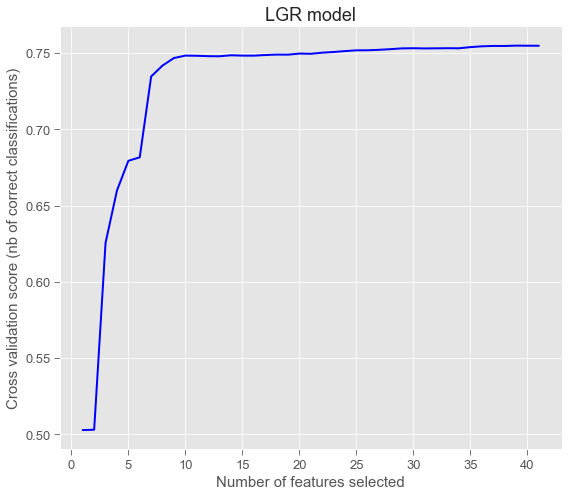

Saving figure: plot_nbf_vs_cvs_zoomed_lgr


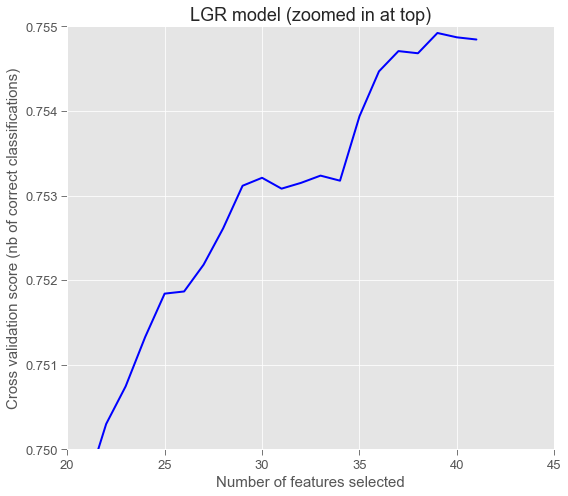

In [35]:
# Plot: número de features versus cross-validation scores:
print("Optimal number of features : %d" % rfecv_lgr.n_features_)
print("Best accuracy: {}".format(np.round(rfecv_lgr.grid_scores_[rfecv_lgr.n_features_-1], decimals=4)))
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_lgr.grid_scores_) + 1), cv_scores=rfecv_lgr.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=None,
                                   title='LGR model', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_lgr', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

# Plot: número de features versus cross-validation scores (com 'foco' na parte de cima do gráfico):
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_lgr.grid_scores_) + 1), cv_scores=rfecv_lgr.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=[20, 45, 0.75, 0.755],
                                   title='LGR model (zoomed in at top)', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_zoomed_lgr', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

In [36]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfecv_lgr.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 39
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_2', 'num_var4_cat_3', 'num_var4_cat_4', 'num_var4_cat_5', 'num_var4_cat_6', 'num_var4_cat_7', 'var36_cat_0', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_2', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'num_meses_var39_vig_ult3_cat_3', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


In [37]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes):
X_train_lgr = X_train[:, rfecv_lgr.get_support()]
print("X_train_lgr (shape):",X_train_lgr.shape)

X_train_lgr (shape): (116820, 39)


**Análise:** com o algoritmo **`Logistic Regression`** a melhor acurácia que obtivemos foi de **`75.49%`** utilizando **`39`** features.

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`LogisticRegression`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [38]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (LGR)..."))
    lgr_scores = cross_val_score(estimator=rfecv_lgr.estimator_, X=X_train_lgr, y=y_train,
                                 cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (LGR):")
    
    # Salvando as pontuações calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="lgr_scores_v1.pickle", object_name=lgr_scores,
                              msg="Version 1 of the scores (LGR) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "lgr_scores_v1.pickle":
    lgr_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="lgr_scores_v1.pickle",
                                          msg="The scores (LGR) has been successfully uploaded!")

The scores (LGR) has been successfully uploaded!


In [39]:
# Mostrando os resultados:
mllib.display_scores(scores=lgr_scores)

Scores: 5
[0.7564 0.7536 0.7565 0.7488 0.7589]
Mean: 0.7548
Standard deviation: 0.0035


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`LGR`**, foi de **3.48 segundos**. Obtivemos um resultado **satisfatório (acima de 75%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [40]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (LGR)..."))
    y_train_pred_lgr = cross_val_predict(estimator=rfecv_lgr.estimator_, X=X_train_lgr, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (LGR):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_lgr_v1.pickle", object_name=y_train_pred_lgr,
                              msg="Version 1 of the predicts (LGR) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_lgr_v1.pickle":
    y_train_pred_lgr = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_lgr_v1.pickle",
                                                msg="The predicts (LGR) has been successfully uploaded!")

The predicts (LGR) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`LGR`**, foi de **3.21 segundos**.

Saving figure: plot_confusion_matrix_lgr_v1


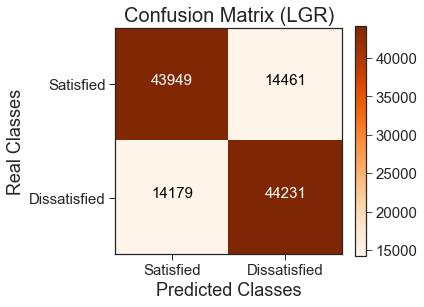

In [41]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_lgr, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (LGR)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_lgr_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 43949`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 14461`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 14179`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 44231`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [42]:
# Calculando e mostrando as métricas de classificação com o "LGR":
print("Metrics of 'LGR' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_lgr, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['LGR', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['LGR', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['LGR', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['LGR', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'LGR' model:
Accuracy = 0.7548
Precision = 0.7536
Recall = 0.7573
f1-score = 0.7554


**Análise:**

1. com o classificador **`LGR`** obtivemos uma taxa de **acurácia** de **75.48%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`LGR`** apresentou um resultado *muito abaixo do mínimo desejado*;


2. com o nosso classificador **`LGR`** obtivemos uma taxa de **precisão** de **75.36%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`LGR`** obtivemos uma taxa de **revocação** de **75.73%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`LGR`** apresentou um resultado *muito abaixo do mínimo desejado*;


4. com o classificador **`LGR`** obtivemos uma **`pontuação F1`** **baixa**, porque as taxas de **precisão** e **revocação** também foram baixas.

### `Curva ROC`

In [43]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (LGR)..."))
    y_dec_scores_lgr = cross_val_predict(estimator=rfecv_lgr.estimator_, X=X_train_lgr, y=y_train,
                                         cv=NUM_FOLDS_CVP, method="decision_function", n_jobs=-1)
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (LGR):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_lgr_v1.pickle", object_name=y_dec_scores_lgr,
                              msg="Version 1 of the decision scores (LGR) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_lgr_v1.pickle":
    y_dec_scores_lgr = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_lgr_v1.pickle",
                                                msg="The decision scores (LGR) has been successfully uploaded!")

The decision scores (LGR) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`LGR`**, foi de **3.19 segundos**.

In [44]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_lgr)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_lgr)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['LGR', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_lgr_v1


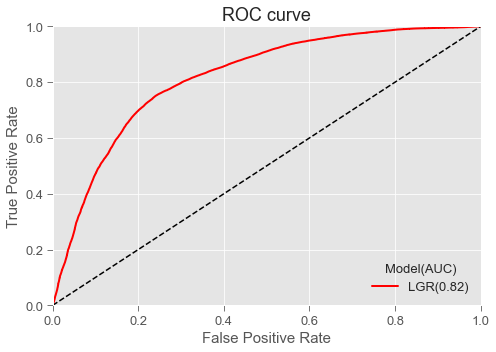

In [45]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='LGR', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_lgr_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`LGR`** apresentou uma ***`ROC curve`*** **distante** do *canto superior esquerdo*!

## 4.4- [DTC](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (Decision Tree Classifier):

In [46]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (DTC)..."))
    
    # Criando uma instância do classificador DTC:
    dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
    
    # Criando a instância de "RFECV":
    rfecv_dtc = RFECV(estimator=dtc, step=1, cv=NUM_FOLDS, scoring='accuracy', n_jobs=-1)
    
    # Fit nos dados de treinamento:
    rfecv_dtc.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (DTC):")

    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfecv_dtc_v1.pickle", object_name=rfecv_dtc,
                              msg="Version 1 of the model (DTC) was successfully saved!")
else:
    # O modelo (DTC) já foi treinado!
    # Carregando o modelo "rfecv_dtc_v1.pickle":
    rfecv_dtc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_dtc_v1.pickle",
                                         msg="The model (DTC) has been successfully uploaded!")

The model (DTC) has been successfully uploaded!


**Análise:** o treinamento do **`DTC`** demorou **`43.65 segundos`**.

Optimal number of features : 41
Best accuracy: 0.9071
Saving figure: plot_nbf_vs_cvs_dtc


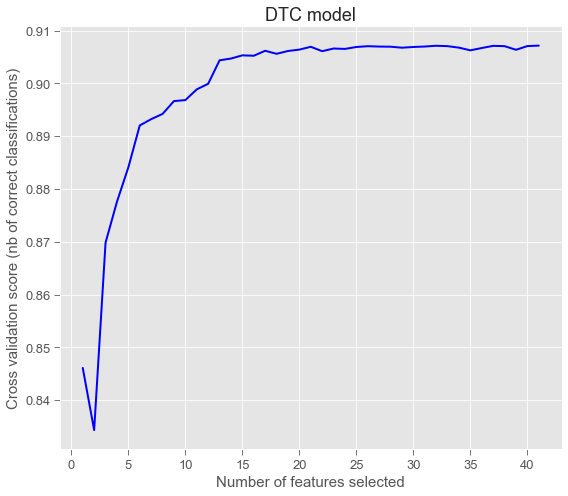

Saving figure: plot_nbf_vs_cvs_zoomed_dtc


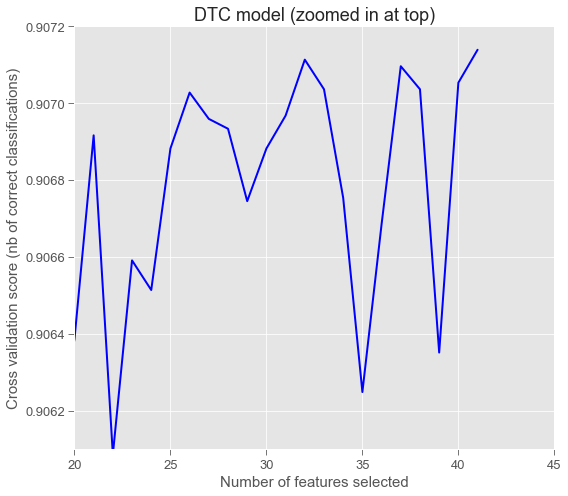

In [47]:
# Plot: número de features versus cross-validation scores:
print("Optimal number of features : %d" % rfecv_dtc.n_features_)
print("Best accuracy: {}".format(np.round(rfecv_dtc.grid_scores_[rfecv_dtc.n_features_-1], decimals=4)))
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_dtc.grid_scores_) + 1), cv_scores=rfecv_dtc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=None,
                                   title='DTC model', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_dtc', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

# Plot: número de features versus cross-validation scores (com 'foco' na parte de cima do gráfico):
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_dtc.grid_scores_) + 1), cv_scores=rfecv_dtc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=[20, 45, 0.9061, 0.9072],
                                   title='DTC model (zoomed in at top)', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_zoomed_dtc', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

In [48]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfecv_dtc.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 41
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_2', 'num_var4_cat_3', 'num_var4_cat_4', 'num_var4_cat_5', 'num_var4_cat_6', 'num_var4_cat_7', 'var36_cat_0', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_1', 'num_meses_var5_ult3_cat_2', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'num_meses_var39_vig_ult3_cat_3', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'num_var5_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


In [49]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes):
X_train_dtc = X_train[:, rfecv_dtc.get_support()]
print("X_train_dtc (shape):",X_train_dtc.shape)

X_train_dtc (shape): (116820, 41)


**Análise:** com o algoritmo **`DTC`** a melhor acurácia que obtivemos foi de **`90.71%`** utilizando **`41`** features.

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`DecisionTreeClassifier`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [50]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (DTC)..."))
    dtc_scores = cross_val_score(estimator=rfecv_dtc.estimator_, X=X_train_dtc, y=y_train,
                                 cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (DTC):")
    
    # Salvando as pontuações (scores) calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="dtc_scores_v1.pickle", object_name=dtc_scores,
                              msg="Version 1 of the scores (DTC) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "dtc_scores_v1.pickle":
    dtc_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="dtc_scores_v1.pickle",
                                          msg="The scores (DTC) has been successfully uploaded!")

The scores (DTC) has been successfully uploaded!


In [51]:
# Mostrando os resultados:
mllib.display_scores(scores=dtc_scores)

Scores: 5
[0.881  0.9137 0.9165 0.9082 0.9163]
Mean: 0.9071
Standard deviation: 0.0134


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`DTC`**, foi de **2.86 segundos**. Obtivemos um resultado **excelente (acima de 91%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [52]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (DTC)..."))
    y_train_pred_dtc = cross_val_predict(estimator=rfecv_dtc.estimator_, X=X_train_dtc, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (DTC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_dtc_v1.pickle", object_name=y_train_pred_dtc,
                              msg="Version 1 of the predicts (DTC) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_dtc_v1.pickle":
    y_train_pred_dtc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_dtc_v1.pickle",
                                                msg="The predicts (DTC) has been successfully uploaded!")

The predicts (DTC) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`DTC`**, foi de **2.32 segundos**.

Saving figure: plot_confusion_matrix_dtc_v1


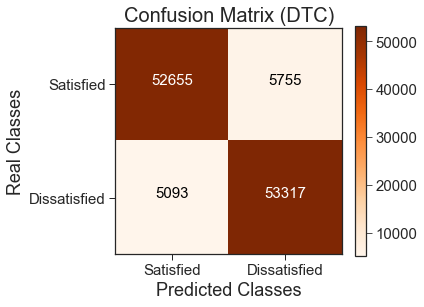

In [53]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_dtc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (DTC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_dtc_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 52655`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 5755`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 5093`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 53317`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [54]:
# Calculando e mostrando as métricas de classificação com o "DTC":
print("Metrics of 'DTC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_dtc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['DTC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['DTC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['DTC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['DTC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'DTC' model:
Accuracy = 0.9071
Precision = 0.9026
Recall = 0.9128
f1-score = 0.9077


**Análise:**

1. com o classificador **`DTC`** obtivemos uma taxa de **acurácia** de **90.71%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`DTC`** apresentou um resultado *acima do mínimo desejado*;


2. com o nosso classificador **`DTC`** obtivemos uma taxa de **precisão** de **90.26%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`DTC`** obtivemos uma taxa de **revocação** de **91.28%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`DTC`** apresentou um resultado *acima do mínimo desejado*;


4. com o classificador **`DTC`** obtivemos uma **`pontuação F1`** **alta**, devido as ótimas taxa de **precisão** e **revocação**.

### `Curva ROC`

In [55]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (DTC)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_dtc = cross_val_predict(estimator=rfecv_dtc.estimator_, X=X_train_dtc, y=y_train,
                                     cv=NUM_FOLDS_CVP, method="predict_proba", n_jobs=-1)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_dtc = y_probas_dtc[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (DTC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_dtc_v1.pickle", object_name=y_dec_scores_dtc,
                              msg="Version 1 of the decision scores (DTC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_dtc_v1.pickle":
    y_dec_scores_dtc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_dtc_v1.pickle",
                                                msg="The decision scores (DTC) has been successfully uploaded!")

The decision scores (DTC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`DTC`**, foi de **2.23 segundos**.

In [56]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_dtc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_dtc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['DTC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_dtc_v1


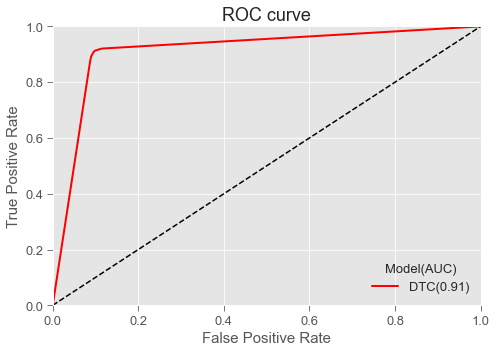

In [57]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='DTC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_dtc_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`DTC`** apresentou uma ***`ROC curve`*** **próxima** do *canto superior esquerdo*!

## 05- Salvando os `datasets` de treinamento:

> 5.1 **`X_train_v2.pickle`**: dados de treinamento **balanceados** (variáveis preditoras);

> 5.2 **`y_train_v2.pickle`**: dados de treinamento **balanceados** (variável *target*);

> 5.3 **`feature_names.pickle`**: nome das **features** dos dados de treinamento **balanceados** (variáveis preditoras).

In [58]:
# 5.1 Salvando o dataset "X_train" (Variáveis Preditoras):
dslib.pickle_object_save (path=PROJECT_DATA_PATH, file="X_train_v2.pickle", object_name=X_train,
                          msg="The 'X_train_v2' (dataset) has been successfully saved!")

# 5.2 Salvando o dataset "y_train" (Variável Target):
dslib.pickle_object_save (path=PROJECT_DATA_PATH, file="y_train_v2.pickle", object_name=y_train,
                          msg="The 'y_train_v2' (dataset) has been successfully saved!")

# 5.3 Salvando os nomes das 'features' do dataset "X_train" (Variáveis Preditoras):
dslib.pickle_object_save (path=PROJECT_DATA_PATH, file="features_names.pickle", object_name=feat_names,
                          msg="The 'features_names' has been successfully saved!")

The 'X_train_v2' (dataset) has been successfully saved!
The 'y_train_v2' (dataset) has been successfully saved!
The 'features_names' has been successfully saved!


## 06- Salvando as `métricas de classificação`:

In [59]:
# Mostrar as métricas de classificação calculadas nesta etapa:
classif_metrics_df.loc[['SGD', 'KNN', 'LGR', 'DTC'], :]

,Accuracy,Precision,Recall,f1-score,AUC
Models,,,,,
SGD,0.7567,0.7557,0.7586,0.7571,0.8182
KNN,0.8707,0.8492,0.9015,0.8746,0.9302
LGR,0.7548,0.7536,0.7573,0.7554,0.8181
DTC,0.9071,0.9026,0.9128,0.9077,0.9133


In [60]:
# 5.4 Salvando as métricas de classificação:
dslib.pickle_object_save (path=PROJECT_ML_PATH, file="classif_metrics_df_v1.pickle", object_name=classif_metrics_df,
                          msg="The 'classif_metrics_df_v1' (metrics) has been successfully saved!")

The 'classif_metrics_df_v1' (metrics) has been successfully saved!


## <font color='black'>FIM</font>